In [1]:
library(statnet)
library(stats)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.1.2"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
ndtv           "0.13.0"  "0.13.1" "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.2"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el_dist = read.csv("../data/2011/features/dist.csv", stringsAsFactors = FALSE)
el_dist$log_dist = log(el_dist$dist)
dist_net = network(el_dist, directed = TRUE, matrix.type = "edgelist")
set.edge.value(dist_net, "dist", el_dist$dist)
set.edge.value(dist_net, "log_dist", el_dist$log_dist)
dist_net

 Network attributes:
  vertices = 142 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 20164 
    missing edges= 0 
    non-missing edges= 20164 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [3]:
el_diplomatic = read.csv("../data/2011/features/dip_exhange_clean.csv", stringsAsFactors = FALSE)
diplomatic_exchange_net = network(el_diplomatic, directed = TRUE, matrix.type = "edgelist")
diplomatic_exchange_net

 Network attributes:
  vertices = 142 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 7162 
    missing edges= 0 
    non-missing edges= 7162 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [4]:
el = read.csv("../data/2011/edgelist.csv", stringsAsFactors = FALSE)
nl = read.csv("../data/2011/nodelist.csv", stringsAsFactors = FALSE)

In [5]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)
nl$log_area <- log(nl$area)
nl$log_population <- log(nl$population)
nl$log_gdp_per_capita <- log(nl$gdp_per_capita)
nl$log_gni_atlas <- log(nl$gni_atlas)

In [6]:
nl$scaled_gdp_us_dollar = as.numeric(scale(nl$gdp_us_dollar))
nl$scaled_gdp_growth = as.numeric(scale(nl$gdp_growth))
nl$scaled_inflation_rate = as.numeric(scale(nl$inflation_rate))
nl$scaled_population = as.numeric(scale(nl$log_population))
nl$scaled_gdp_per_capita = as.numeric(scale(nl$log_gdp_per_capita))
nl$scaled_life_expectancy = as.numeric(scale(nl$life_expectancy))
nl$scaled_gni_atlas = as.numeric(scale(nl$log_gni_atlas))
nl$scaled_agriculture_forestry_fishing_of_gdp = as.numeric(scale(nl$agriculture_forestry_fishing_of_gdp))
nl$scaled_industry_of_gdp = as.numeric(scale(nl$industry_of_gdp))
nl$scaled_merchandise_of_gdp = as.numeric(scale(nl$merchandise_of_gdp))
nl$scaled_net_barrier_of_trade = as.numeric(scale(nl$net_barrier_of_trade))
nl$scaled_foreign_direct_investment_inflows = as.numeric(scale(nl$foreign_direct_investment_inflows))
nl$scaled_happiness = as.numeric(scale(nl$happiness))

In [7]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')
set.edge.value(net, "trade", el$weight)
net

 Network attributes:
  vertices = 142 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 2911 
    missing edges= 0 
    non-missing edges= 2911 

 Vertex attribute names: 
    agriculture_forestry_fishing_of_gdp area colonizer continent country_iso3 foreign_direct_investment_inflows gdp_growth gdp_per_capita gdp_us_dollar gni_atlas happiness industry_of_gdp inflation_rate landlocked langoff_1 life_expectancy log_area log_gdp_per_capita log_gni_atlas log_population merchandise_of_gdp net_barrier_of_trade population scaled_agriculture_forestry_fishing_of_gdp scaled_foreign_direct_investment_inflows scaled_gdp_growth scaled_gdp_per_capita scaled_gdp_us_dollar scaled_gni_atlas scaled_happiness scaled_industry_of_gdp scaled_inflation_rate scaled_life_expectancy scaled_merchandise_of_gdp scaled_net_barrier_of_trade scaled_population vertex.names 

 Edge attribute names not shown 

### Check correlations

In [97]:
filtered_nl = nl[, !startsWith(colnames(nl), 'scaled') & !startsWith(colnames(nl), 'log')]
nums <- unlist(lapply(filtered_nl, is.numeric))

In [10]:
cor(filtered_nl[, nums])

,foreign_direct_investment_inflows,agriculture_forestry_fishing_of_gdp,net_barrier_of_trade,gdp_growth,inflation_rate,gdp_us_dollar,area,happiness,life_expectancy,gni_atlas,landlocked,merchandise_of_gdp,population,industry_of_gdp,gdp_per_capita
foreign_direct_investment_inflows,1.000000000,-0.20821232,-0.14608665,-0.001497017,-0.12416737,0.49457841,0.46038971,0.2239785071,0.25640012,0.65797926,-0.145524063,0.068594447,0.46696862,-0.0552996271,0.28971162
agriculture_forestry_fishing_of_gdp,-0.208212315,1.00000000,0.03580712,0.165763517,0.23674093,-0.53136895,-0.09249523,-0.1531260781,-0.68662937,-0.19449307,0.286574108,-0.307283533,0.02129162,-0.3838282323,-0.52596397
net_barrier_of_trade,-0.146086647,0.03580712,1.00000000,0.017665458,0.20196871,-0.06799672,0.11714860,0.0336260291,-0.18901089,-0.15643763,0.016147637,-0.114099237,-0.12206037,0.4770089437,-0.16047218
gdp_growth,-0.001497017,0.16576352,0.01766546,1.000000000,-0.02638458,-0.05660911,-0.01228871,0.0748356888,-0.14793327,-0.02736032,0.121345706,0.025787762,0.06876546,-0.1644089414,-0.07626581
inflation_rate,-0.124167372,0.23674093,0.20196871,-0.026384583,1.00000000,-0.13293777,0.02165982,-0.0975146522,-0.23003153,-0.12280374,0.042611808,-0.042328269,0.03516223,0.0528376918,-0.32691971
gdp_us_dollar,0.494578414,-0.53136895,-0.06799672,-0.056609110,-0.13293777,1.00000000,0.44853163,0.2701290931,0.59300917,0.55991833,-0.346058406,-0.082528306,0.39627388,0.1605062721,0.50340004
area,0.460389713,-0.09249523,0.11714860,-0.012288706,0.02165982,0.44853163,1.00000000,0.1038838527,0.05482463,0.50860805,-0.106696070,-0.250775838,0.43780829,0.0518896271,0.06670813
happiness,0.223978507,-0.15312608,0.03362603,0.074835689,-0.09751465,0.27012909,0.10388385,1.0000000000,0.18813889,0.19901721,0.006288746,-0.089789428,0.09412165,-0.0002910643,0.28988403
life_expectancy,0.256400121,-0.68662937,-0.18901089,-0.147933269,-0.23003153,0.59300917,0.05482463,0.1881388929,1.00000000,0.23510089,-0.353834898,0.194883734,0.01143683,0.0377887549,0.62206418
gni_atlas,0.657979263,-0.19449307,-0.15643763,-0.027360322,-0.12280374,0.55991833,0.50860805,0.1990172091,0.23510089,1.00000000,-0.147334223,-0.183745087,0.45808355,-0.0415777655,0.26221043


In [11]:
cor_results = cor(filtered_nl[, nums]) > .6
diag(cor_results) = F

In [12]:
col_names = colnames(cor_results)
temp = matrix('', nrow=length(col_names), ncol = length(col_names))
for (i in 1:length(col_names)) {
    for (j in 1:length(col_names)) {
        temp[i, j] = paste(col_names[i], col_names[j])
    }
}

In [13]:
temp[cor_results]

[1] "gni_atlas foreign_direct_investment_inflows"
[2] "gdp_per_capita life_expectancy"             
[3] "foreign_direct_investment_inflows gni_atlas"
[4] "life_expectancy gdp_per_capita"

In [14]:
model = ergm(
                        net ~
                        edges +
                        mutual +
                        nodecov("scaled_gdp_us_dollar") +
                        absdiff("scaled_gdp_us_dollar") +
                        nodecov("scaled_inflation_rate") +
                        absdiff("scaled_inflation_rate") +
                        nodecov("scaled_gdp_growth") +
                        absdiff("scaled_gdp_growth") +
                        nodematch("colonizer") +
                        nodematch("continent") +
                        nodematch("landlocked") +
                        nodematch("langoff_1") +
                        edgecov(diplomatic_exchange_net) +
                        nodecov("scaled_population") +
                        nodecov("scaled_life_expectancy") +
                        nodecov("scaled_gni_atlas") +
                        nodecov("scaled_agriculture_forestry_fishing_of_gdp") +
                        nodecov("scaled_industry_of_gdp") +
                        nodecov("scaled_merchandise_of_gdp") +
                        nodecov("scaled_net_barrier_of_trade") +
                        nodecov("scaled_foreign_direct_investment_inflows") +
                        nodecov("scaled_happiness") +
                        absdiff("scaled_happiness")
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.4285.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.4537.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



In [15]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodecov("scaled_gdp_us_dollar") + 
    absdiff("scaled_gdp_us_dollar") + nodecov("scaled_inflation_rate") + 
    absdiff("scaled_inflation_rate") + nodecov("scaled_gdp_growth") + 
    absdiff("scaled_gdp_growth") + nodematch("colonizer") + nodematch("continent") + 
    nodematch("landlocked") + nodematch("langoff_1") + edgecov(diplomatic_exchange_net) + 
    nodecov("scaled_population") + nodecov("scaled_life_expectancy") + 
    nodecov("scaled_gni_atlas") + nodecov("scaled_agriculture_forestry_fishing_of_gdp") + 
    nodecov("scaled_industry_of_gdp") + nodecov("scaled_merchandise_of_gdp") + 
    nodecov("scaled_net_barrier_of_trade") + nodecov("scaled_foreign_direct_investment_inflows") + 
    nodecov("scaled_happiness") + absdiff("scaled_happiness"))

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                                                   Estimate Std. Error MCMC %
edges                                              -1.70045   

In [16]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [17]:
gof


Goodness-of-fit for model statistics 

                                                           obs         min
edges                                               2910.00000  2798.00000
mutual                                               355.00000   315.00000
nodecov.scaled_gdp_us_dollar                       -1549.92463 -1687.78619
absdiff.scaled_gdp_us_dollar                        3382.89437  3198.60712
nodecov.scaled_inflation_rate                        151.57112   -25.79724
absdiff.scaled_inflation_rate                       2660.93304  2476.97126
nodecov.scaled_gdp_growth                            331.87216   162.70536
absdiff.scaled_gdp_growth                           1928.97633  1812.70457
nodematch.colonizer                                  861.00000   799.00000
nodematch.continent                                  419.00000   367.00000
nodematch.landlocked                                1485.00000  1412.00000
nodematch.langoff_1                                  167.000

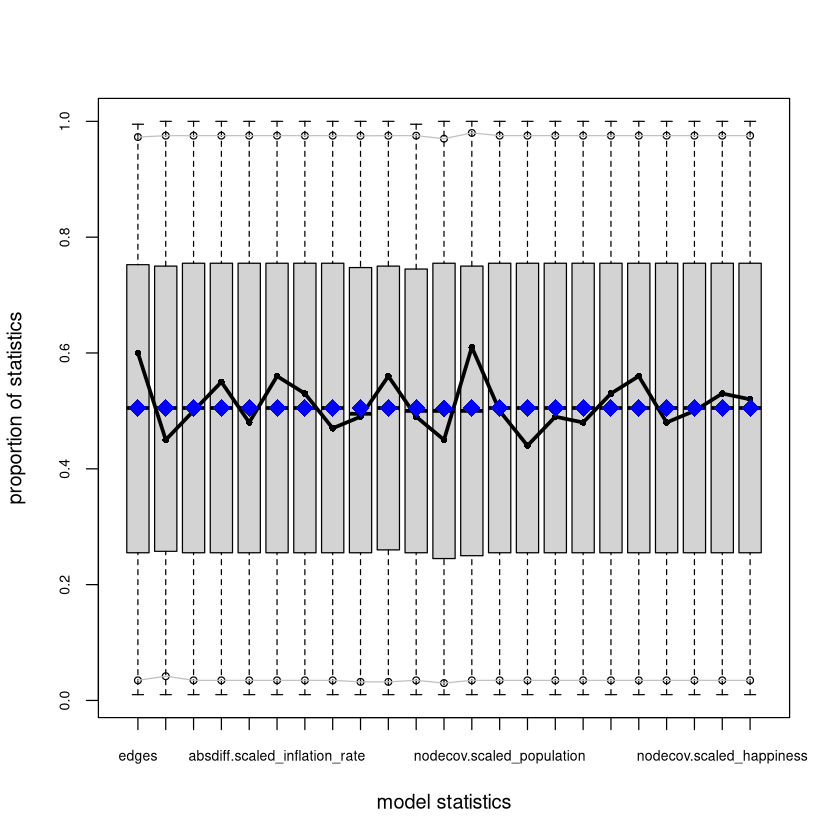

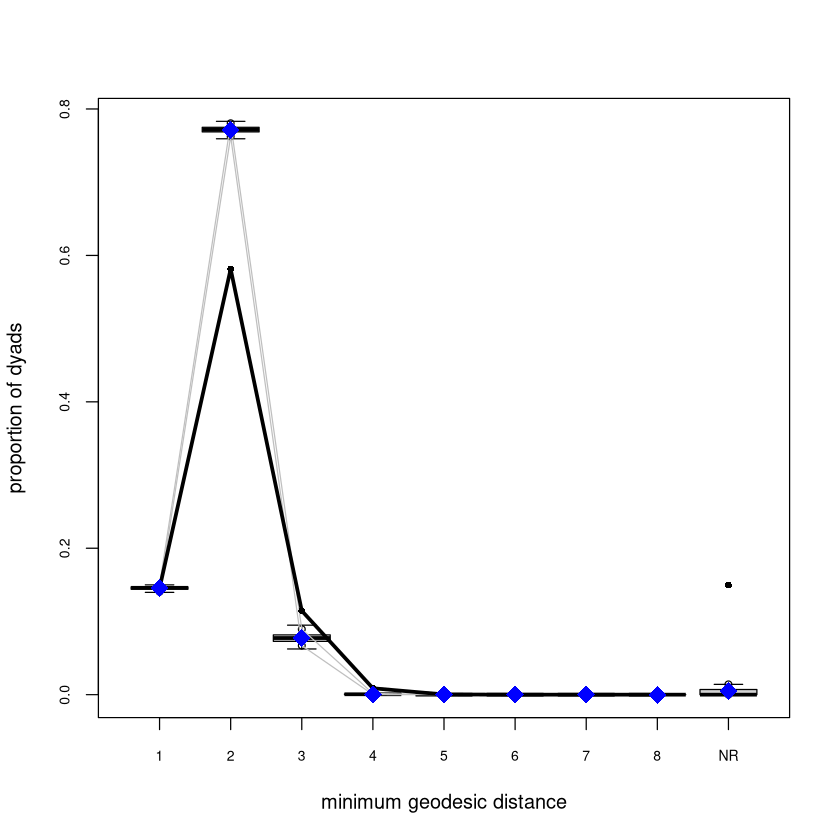

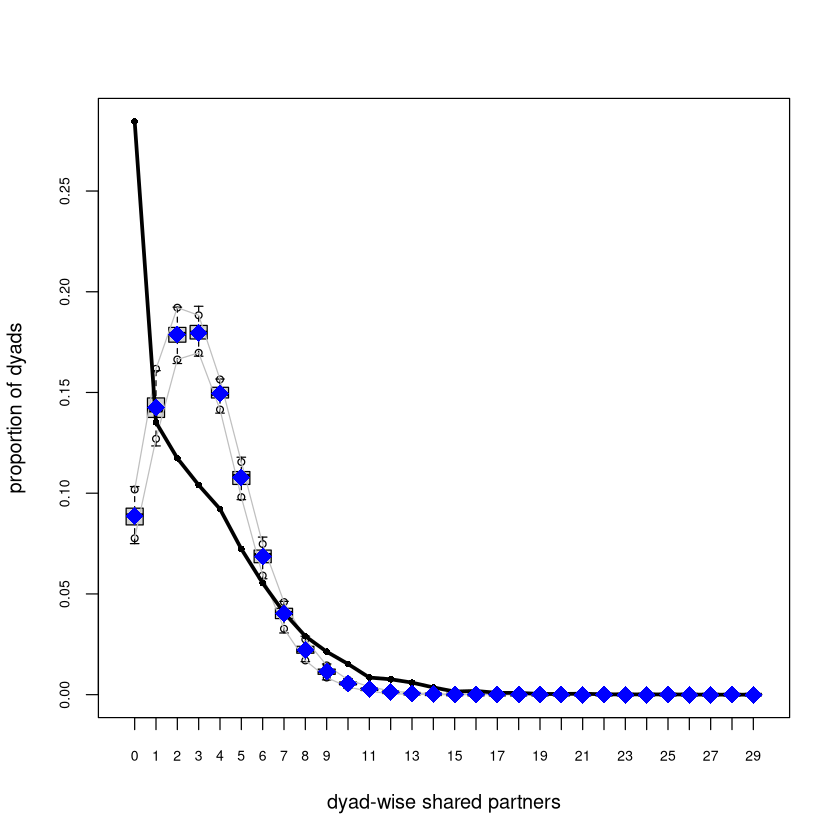

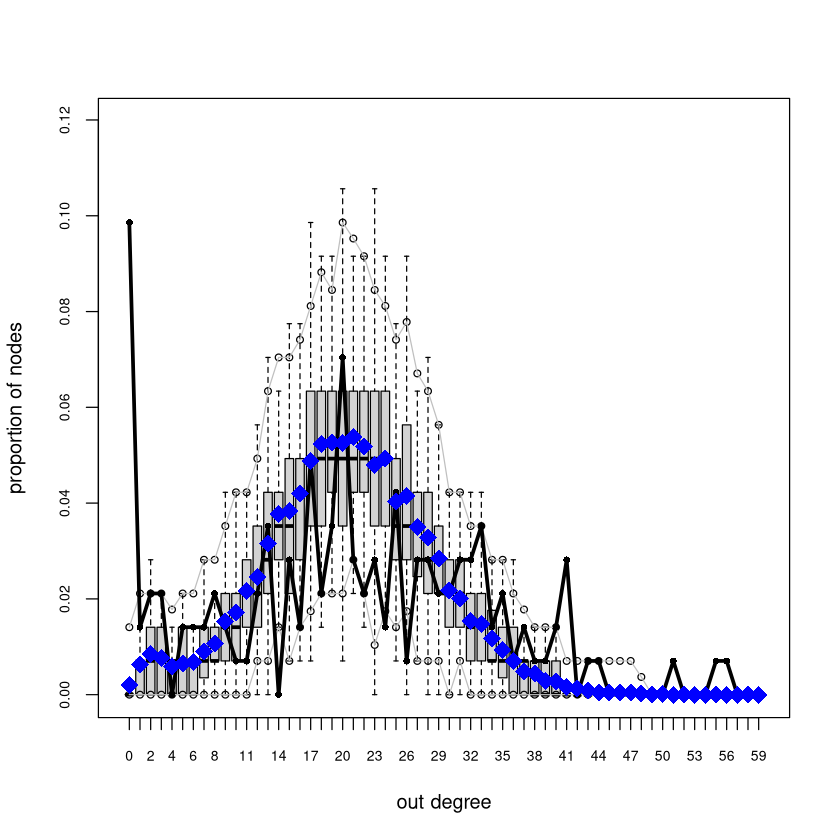

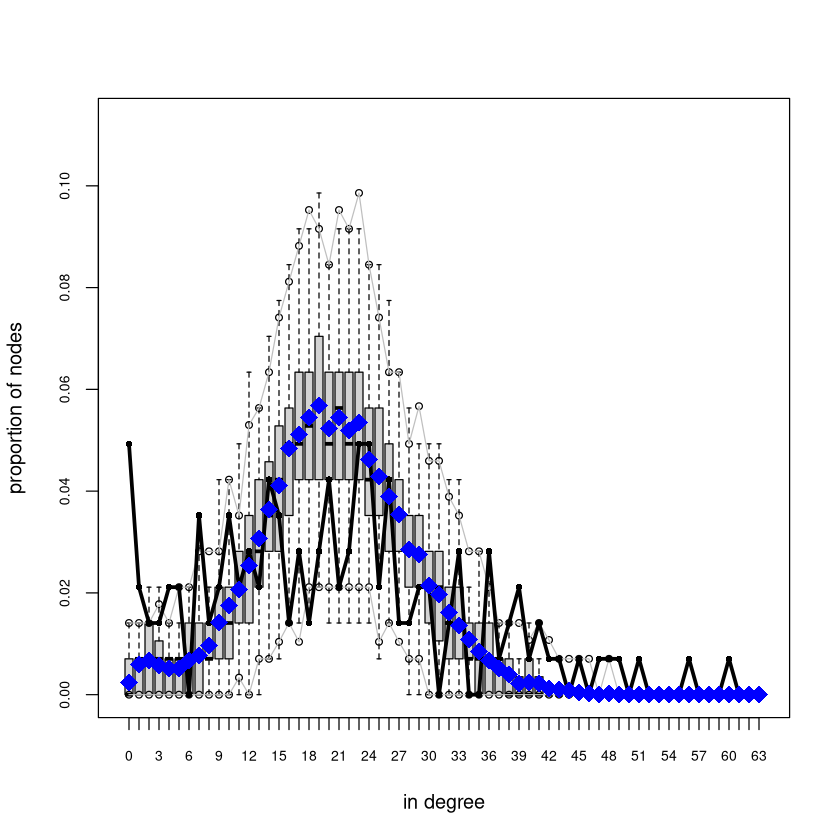

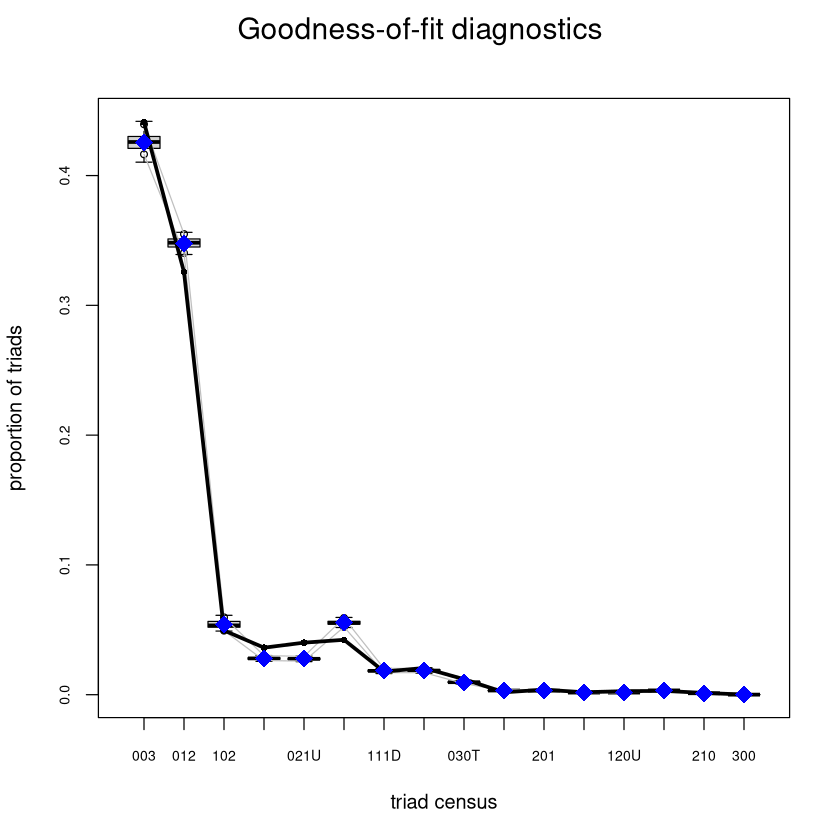

In [18]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                                                        Mean    SD Naive SE
edges                                               13.79077 50.40   0.7875
mutual                                               4.12915 19.14   0.2990
nodecov.scaled_gdp_us_dollar                       -13.69724 61.15   0.9554
absdiff.scaled_gdp_us_dollar                        16.30814 71.28   1.1137
nodecov.scaled_inflation_rate                      -12.36829 69.11   1.0799
absdiff.scaled_inflation_rate                       13.90311 79.85   1.2477
nodecov.scaled_gdp_growth                            7.69361 58.69   0.9170
absdiff.scaled_gdp_growth                           -4.46493 59.77   0.9339
nodematch.colonizer                                 12.35278 26.18   0.4091
nodematch

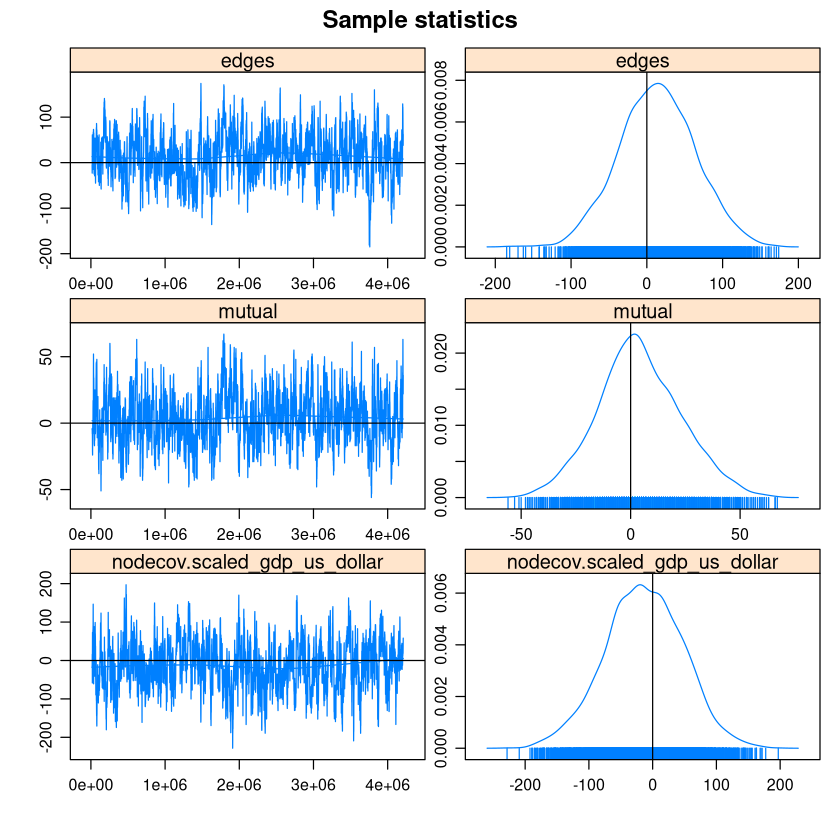

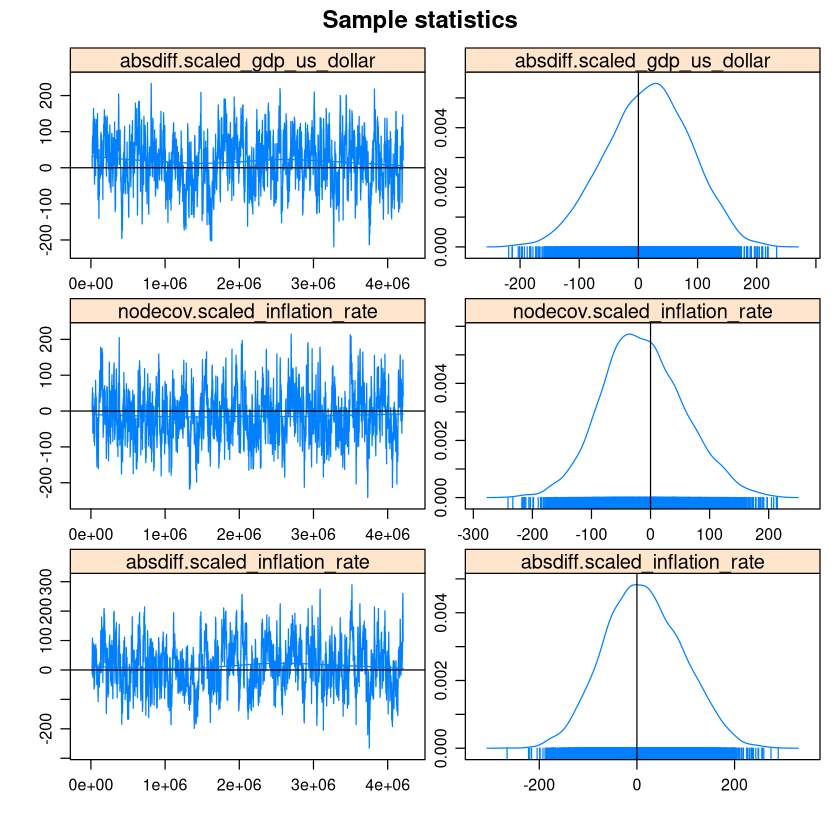

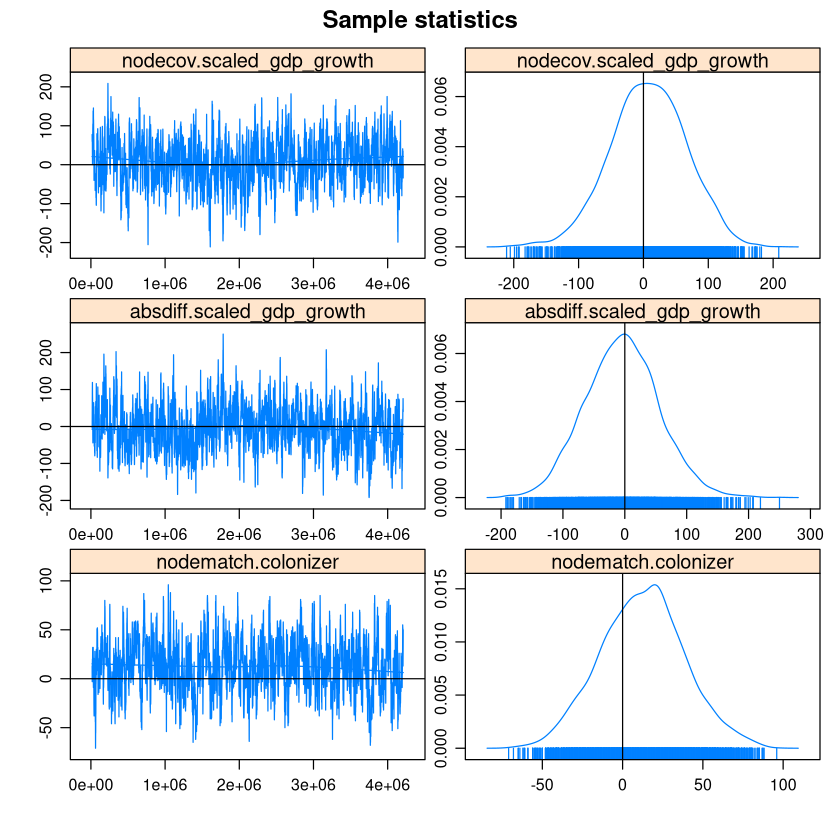

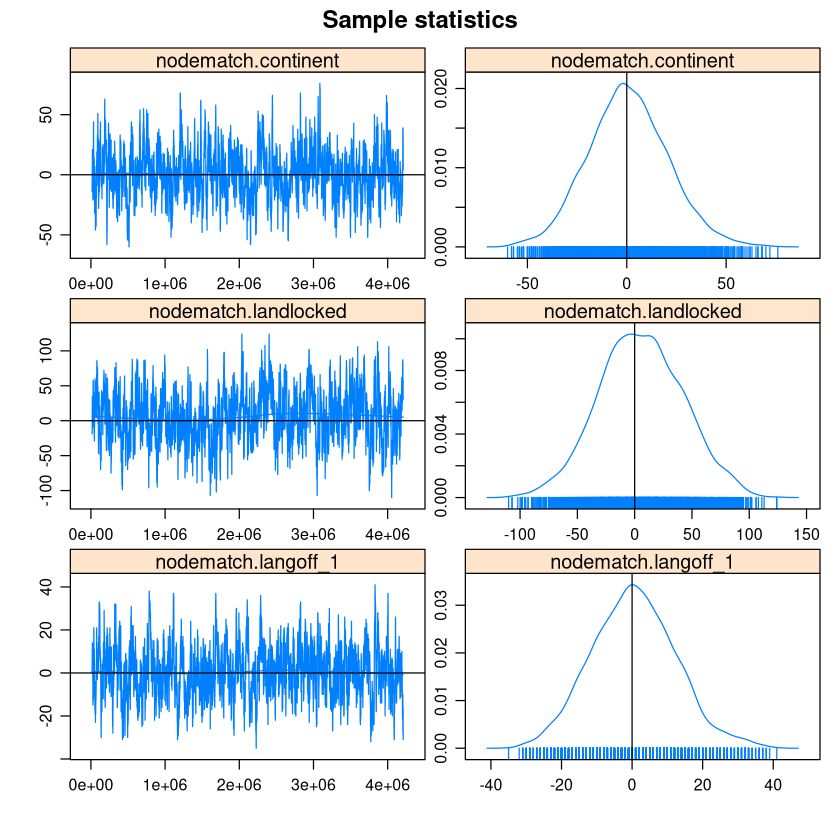

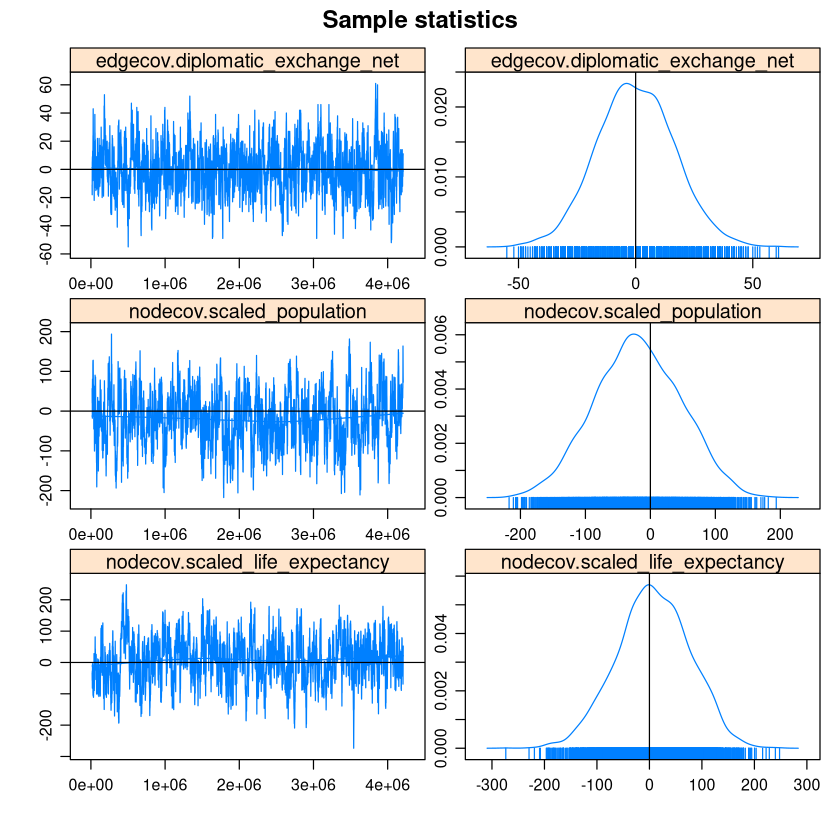

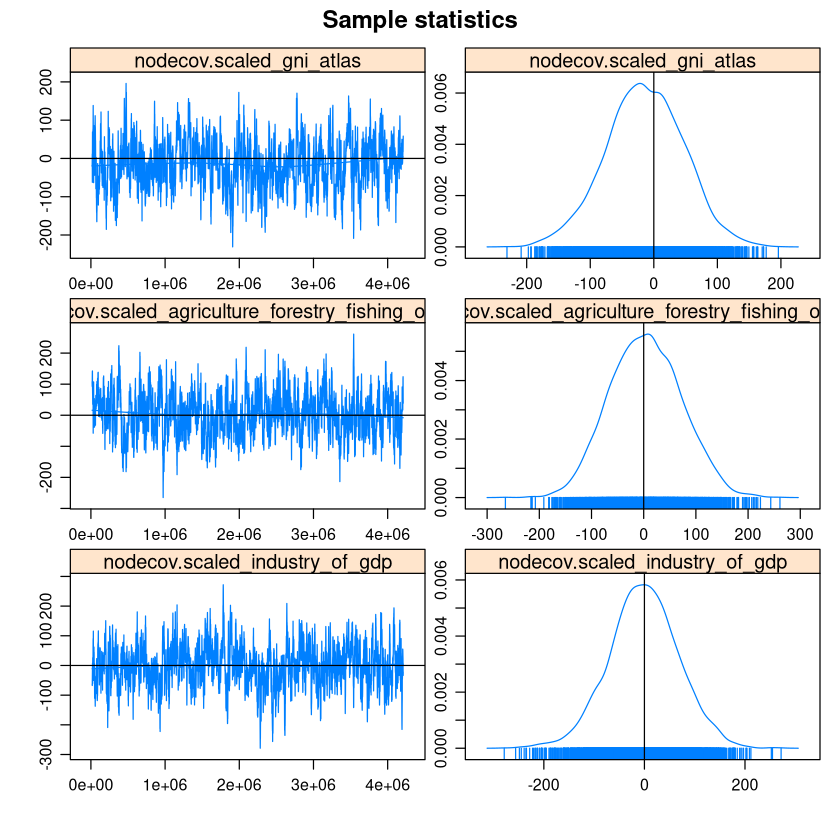

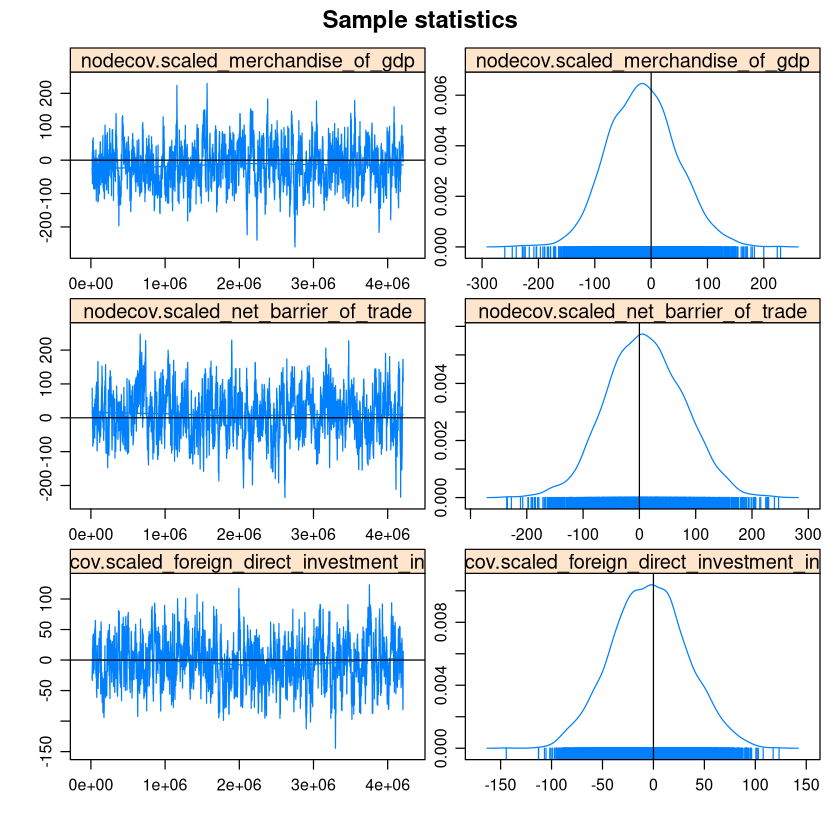


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


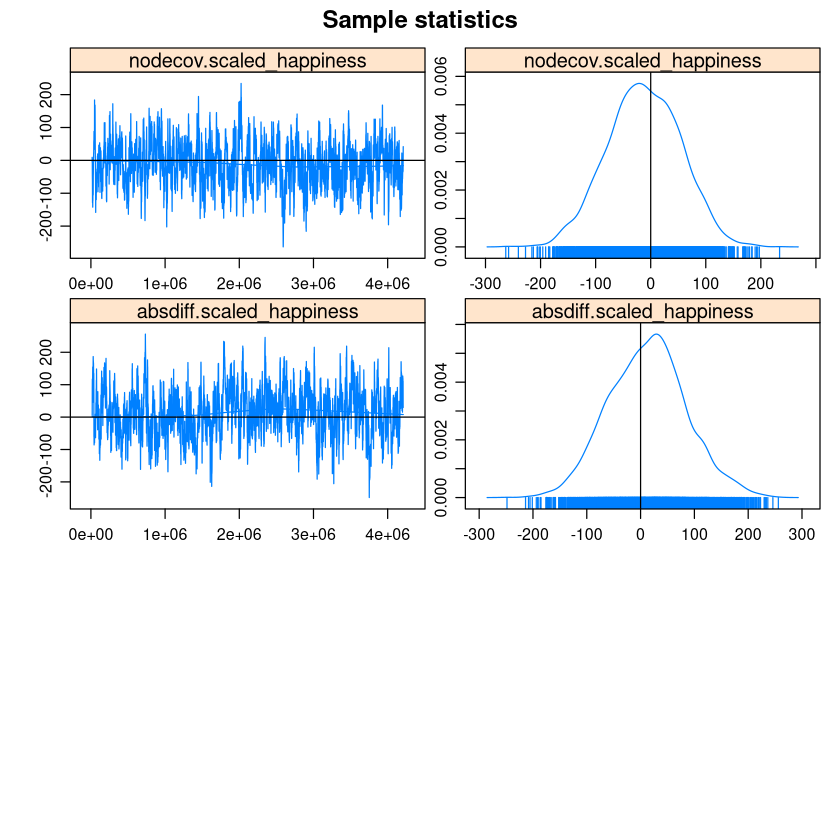

In [19]:
mcmc.diagnostics(model)